In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [59]:
df["Exited"].unique()

array([1, 0])

In [60]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [61]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [62]:
X = dataset.iloc[:, 3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [63]:
y = dataset.iloc[:, 13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [64]:
geography=pd.get_dummies(X["Geography"],drop_first=True) #since drop first it will drop last column its internal
geography


,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [65]:
gender=pd.get_dummies(X["Gender"],drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [66]:
X = pd.concat([X,gender,geography],axis=1)

In [67]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,True,False


In [68]:
X = X.drop(['Geography','Gender'],axis=1) # axis 1 because its columns not rows

In [69]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False


In [70]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)

In [72]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
4028,463,41,8,123151.51,2,1,0,70127.93,False,True,False
781,774,28,1,71264.02,2,0,1,68759.57,False,False,False
430,619,57,3,137946.39,1,1,1,72467.99,True,True,False
2956,792,30,8,0.00,2,1,0,199644.20,True,False,False
9373,641,36,1,0.00,2,1,0,102021.39,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9591,708,40,8,83015.71,1,1,0,101089.76,True,False,True
2309,599,46,9,123444.72,1,1,1,31368.08,True,True,False
6325,743,59,5,108585.35,1,1,1,192127.22,True,True,False
7738,561,33,6,0.00,2,0,0,173680.39,True,False,False


In [73]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
5311,714,40,0,0.00,2,1,0,62762.12,False,False,False
6415,674,42,9,0.00,2,1,0,4292.72,False,False,False
9170,694,30,2,0.00,3,0,1,15039.41,True,False,False
2019,706,30,3,98415.37,1,1,1,110520.48,True,False,False
5402,828,37,4,0.00,2,1,0,94845.45,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2983,523,35,8,138782.76,1,1,1,186118.93,True,True,False
3506,445,45,10,0.00,2,0,1,90977.48,True,False,True
2947,774,36,7,103688.19,1,0,1,118971.74,True,False,False
6382,797,24,5,0.00,2,1,0,182257.61,True,False,False


In [74]:
Y_train

4028    0
781     0
430     1
2956    0
9373    0
       ..
9591    0
2309    1
6325    1
7738    0
3451    0
Name: Exited, Length: 8000, dtype: int64

In [75]:
Y_test

5311    0
6415    0
9170    0
2019    0
5402    0
       ..
2983    0
3506    0
2947    0
6382    0
1714    0
Name: Exited, Length: 2000, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
X_train.shape

(8000, 11)

In [78]:
X_train[1:5]

array([[ 1.27647857, -1.03565334, -1.38590523, -0.08836239,  0.81416539,
        -1.5431248 ,  0.97554884, -0.53411591, -1.09665089, -0.57869742,
        -0.57754272],
       [-0.33273633,  1.71219175, -0.6966359 ,  0.98107005, -0.91580091,
         0.64803573,  0.97554884, -0.46954753,  0.91186722,  1.72801876,
        -0.57754272],
       [ 1.46335514, -0.84614678,  1.02653744, -1.231274  ,  0.81416539,
         0.64803573, -1.02506401,  1.74475443,  0.91186722, -0.57869742,
        -0.57754272],
       [-0.10433163, -0.27762711, -1.38590523, -1.231274  ,  0.81416539,
         0.64803573, -1.02506401,  0.04501531, -1.09665089, -0.57869742,
         1.73147365]])

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

In [81]:

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [82]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 200)

Epoch 1/200
536/536 [==============================] - 0s 397us/step - loss: 0.3485 - accuracy: 0.8578 - val_loss: 0.3414 - val_accuracy: 0.8588
Epoch 2/200
536/536 [==============================] - 0s 360us/step - loss: 0.3480 - accuracy: 0.8578 - val_loss: 0.3412 - val_accuracy: 0.8595
Epoch 3/200
536/536 [==============================] - 0s 359us/step - loss: 0.3483 - accuracy: 0.8567 - val_loss: 0.3409 - val_accuracy: 0.8576
Epoch 4/200
536/536 [==============================] - 0s 359us/step - loss: 0.3482 - accuracy: 0.8565 - val_loss: 0.3411 - val_accuracy: 0.8595
Epoch 5/200
536/536 [==============================] - 0s 362us/step - loss: 0.3477 - accuracy: 0.8587 - val_loss: 0.3413 - val_accuracy: 0.8599
Epoch 6/200
536/536 [==============================] - 0s 360us/step - loss: 0.3479 - accuracy: 0.8584 - val_loss: 0.3412 - val_accuracy: 0.8588
Epoch 7/200
536/536 [==============================] - 0s 359us/step - loss: 0.3479 - accuracy: 0.8584 - val_loss: 0.3409 - val_ac

536/536 [==============================] - 0s 358us/step - loss: 0.3428 - accuracy: 0.8621 - val_loss: 0.3351 - val_accuracy: 0.8607
Epoch 58/200
536/536 [==============================] - 0s 359us/step - loss: 0.3424 - accuracy: 0.8612 - val_loss: 0.3357 - val_accuracy: 0.8588
Epoch 59/200
536/536 [==============================] - 0s 358us/step - loss: 0.3425 - accuracy: 0.8608 - val_loss: 0.3350 - val_accuracy: 0.8603
Epoch 60/200
536/536 [==============================] - 0s 357us/step - loss: 0.3424 - accuracy: 0.8625 - val_loss: 0.3356 - val_accuracy: 0.8588
Epoch 61/200
536/536 [==============================] - 0s 373us/step - loss: 0.3423 - accuracy: 0.8602 - val_loss: 0.3352 - val_accuracy: 0.8607
Epoch 62/200
536/536 [==============================] - 0s 359us/step - loss: 0.3421 - accuracy: 0.8599 - val_loss: 0.3360 - val_accuracy: 0.8591
Epoch 63/200
536/536 [==============================] - 0s 358us/step - loss: 0.3422 - accuracy: 0.8615 - val_loss: 0.3350 - val_accuracy

536/536 [==============================] - 0s 377us/step - loss: 0.3387 - accuracy: 0.8634 - val_loss: 0.3336 - val_accuracy: 0.8607
Epoch 114/200
536/536 [==============================] - 0s 369us/step - loss: 0.3385 - accuracy: 0.8615 - val_loss: 0.3340 - val_accuracy: 0.8591
Epoch 115/200
536/536 [==============================] - 0s 413us/step - loss: 0.3386 - accuracy: 0.8623 - val_loss: 0.3343 - val_accuracy: 0.8599
Epoch 116/200
536/536 [==============================] - 0s 361us/step - loss: 0.3386 - accuracy: 0.8621 - val_loss: 0.3339 - val_accuracy: 0.8607
Epoch 117/200
536/536 [==============================] - 0s 358us/step - loss: 0.3385 - accuracy: 0.8630 - val_loss: 0.3335 - val_accuracy: 0.8595
Epoch 118/200
536/536 [==============================] - 0s 359us/step - loss: 0.3383 - accuracy: 0.8619 - val_loss: 0.3338 - val_accuracy: 0.8591
Epoch 119/200
536/536 [==============================] - 0s 358us/step - loss: 0.3381 - accuracy: 0.8615 - val_loss: 0.3335 - val_ac

Epoch 169/200
536/536 [==============================] - 0s 421us/step - loss: 0.3365 - accuracy: 0.8625 - val_loss: 0.3331 - val_accuracy: 0.8591
Epoch 170/200
536/536 [==============================] - 0s 387us/step - loss: 0.3366 - accuracy: 0.8612 - val_loss: 0.3330 - val_accuracy: 0.8618
Epoch 171/200
536/536 [==============================] - 0s 377us/step - loss: 0.3366 - accuracy: 0.8623 - val_loss: 0.3330 - val_accuracy: 0.8595
Epoch 172/200
536/536 [==============================] - 0s 418us/step - loss: 0.3365 - accuracy: 0.8614 - val_loss: 0.3332 - val_accuracy: 0.8591
Epoch 173/200
536/536 [==============================] - 0s 381us/step - loss: 0.3364 - accuracy: 0.8604 - val_loss: 0.3334 - val_accuracy: 0.8614
Epoch 174/200
536/536 [==============================] - 0s 389us/step - loss: 0.3365 - accuracy: 0.8612 - val_loss: 0.3332 - val_accuracy: 0.8595
Epoch 175/200
536/536 [==============================] - 0s 391us/step - loss: 0.3363 - accuracy: 0.8621 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


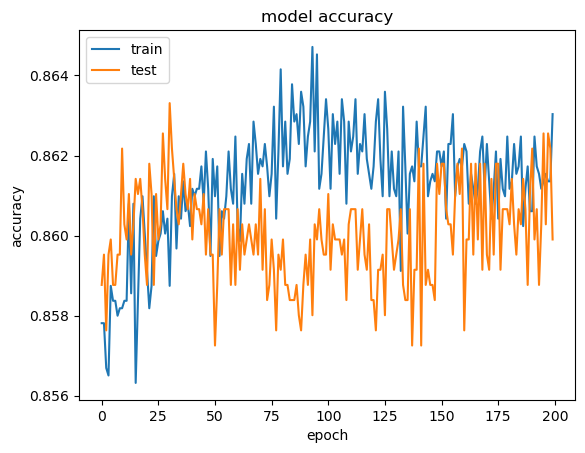

In [93]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

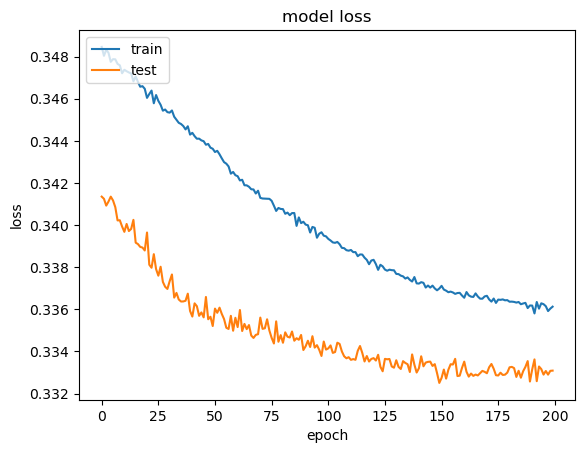

In [94]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 228us/step


In [96]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.871

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1544,   47],
       [ 211,  198]])